In [154]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

In [155]:
df = pd.read_csv("../data/carprice-assignment-6447798486dfd210498974.csv")

In [156]:
# pour voir toutes les colonnes du df
pd.set_option("display.max_columns", None)
df.head()
# symboling, niveau de risque assurance de -3 à 3
# aspiration = turbo ou pas
# carbody = type de voiture
# drivewheel = rwd propu, fwd traction, 4wd 4 roue motrice
# enginelocation = moteur avant ou arriere
# wheelbase = empattement écartement entre les roues

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [157]:
df.shape

(205, 26)

In [158]:
# Vérification des valeurs manquantes dans chaque colonne
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [159]:
df.duplicated().sum()

0

In [160]:
df = df.rename(columns={'symboling': 'niveau_risque_assurance', 'CarName': 'marque_voiture', 'fueltype': 'carburant', 'aspiration': 'turbo', 'doornumber': 'nombre_portes', 'carbody': 'type_vehicule', 'drivewheel': 'roues_motrices', 'enginelocation': 'emplacement_moteur', 'wheelbase': 'empattement(cm)', 'carlength': 'longueur_voiture(cm)', 'carwidth': 'largeur_voiture(cm)', 'carheight': 'hauteur_voiture(cm)', 'curbweight': 'poids_vehicule(kg)', 'enginetype': 'type_moteur', 'cylindernumber': 'nombre_cylindres', 'enginesize': 'taille_moteur', 'fuelsystem': 'systeme_carburant', 'boreratio': 'taux_alésage(cm)', 'stroke': 'course_piston(cm)', 'compressionratio': 'taux_compression', 'horsepower': 'chevaux', 'peakrpm': 'tour_moteur', 'citympg': 'consommation_ville', 'highwaympg': 'consommation_autoroute', 'price': 'prix'})

## Colonne marque_voiture

In [161]:
df["marque_voiture"]

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
                 ...           
200             volvo 145e (sw)
201                 volvo 144ea
202                 volvo 244dl
203                   volvo 246
204                 volvo 264gl
Name: marque_voiture, Length: 205, dtype: object

In [162]:
# Séparer la colonne "marque_voiture" en utilisant l'espace comme délimiteur et stocker les résultats dans un nouveau dataframe
car_name_df = df["marque_voiture"].str.split(" ", n=1, expand=True)

# Renommer les colonnes du nouveau dataframe
car_name_df.columns = ["marque", "modele"]

# Supprimer les espaces dans la colonne "modele"
car_name_df["modele"] = car_name_df["modele"].str.replace(" ", "")

# Ajouter les nouvelles colonnes au dataframe original
df = pd.concat([df, car_name_df], axis=1)

# Supprimer la colonne "marque_voiture"
df.drop("marque_voiture", axis=1, inplace=True)

In [163]:
df.head()

,car_ID,niveau_risque_assurance,carburant,turbo,nombre_portes,type_vehicule,roues_motrices,emplacement_moteur,empattement(cm),longueur_voiture(cm),largeur_voiture(cm),hauteur_voiture(cm),poids_vehicule(kg),type_moteur,nombre_cylindres,taille_moteur,systeme_carburant,taux_alésage(cm),course_piston(cm),taux_compression,chevaux,tour_moteur,consommation_ville,consommation_autoroute,prix,marque,modele
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100ls
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


## type_vehicule

In [164]:
df["type_vehicule"].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: type_vehicule, dtype: int64

In [165]:
# Créer un dictionnaire pour les traductions des types de carrosserie
traductions_type_vehicule = {
    "sedan": "berline",
    "hatchback": "hayon",
    "wagon": "break",
    "hardtop": "coupé",
    "convertible": "décapotable"
}

# Traduire les types de carrosserie dans la colonne "type_vehicule"
df["type_vehicule"] = df["type_vehicule"].map(traductions_type_vehicule)

In [166]:
df["type_vehicule"].value_counts()

berline        96
hayon          70
break          25
coupé           8
décapotable     6
Name: type_vehicule, dtype: int64

## Roues_motrices

In [167]:
df["roues_motrices"].value_counts()

fwd    120
rwd     76
4wd      9
Name: roues_motrices, dtype: int64

In [168]:
# Créer un dictionnaire pour les traductions des types de carrosserie
traductions_roues_motrices = {
    "rwd": "propulsion",
    "fwd": "traction",
    "4wd": "quatre_roues_motrices"
}

# Traduire les types de carrosserie dans la colonne "type_vehicule"
df["roues_motrices"] = df["roues_motrices"].map(traductions_roues_motrices)

In [169]:
df["roues_motrices"].value_counts()

traction                 120
propulsion                76
quatre_roues_motrices      9
Name: roues_motrices, dtype: int64

In [170]:
df.isnull().sum()

car_ID                     0
niveau_risque_assurance    0
carburant                  0
turbo                      0
nombre_portes              0
type_vehicule              0
roues_motrices             0
emplacement_moteur         0
empattement(cm)            0
longueur_voiture(cm)       0
largeur_voiture(cm)        0
hauteur_voiture(cm)        0
poids_vehicule(kg)         0
type_moteur                0
nombre_cylindres           0
taille_moteur              0
systeme_carburant          0
taux_alésage(cm)           0
course_piston(cm)          0
taux_compression           0
chevaux                    0
tour_moteur                0
consommation_ville         0
consommation_autoroute     0
prix                       0
marque                     0
modele                     2
dtype: int64

In [171]:
df.isna().sum()

car_ID                     0
niveau_risque_assurance    0
carburant                  0
turbo                      0
nombre_portes              0
type_vehicule              0
roues_motrices             0
emplacement_moteur         0
empattement(cm)            0
longueur_voiture(cm)       0
largeur_voiture(cm)        0
hauteur_voiture(cm)        0
poids_vehicule(kg)         0
type_moteur                0
nombre_cylindres           0
taille_moteur              0
systeme_carburant          0
taux_alésage(cm)           0
course_piston(cm)          0
taux_compression           0
chevaux                    0
tour_moteur                0
consommation_ville         0
consommation_autoroute     0
prix                       0
marque                     0
modele                     2
dtype: int64

In [172]:
# Suppression des lignes contenant des valeurs nulles
df = df.dropna()
# voir les lignes ou il y a une valeur null
df[df.isnull().any(axis=1)]


,car_ID,niveau_risque_assurance,carburant,turbo,nombre_portes,type_vehicule,roues_motrices,emplacement_moteur,empattement(cm),longueur_voiture(cm),largeur_voiture(cm),hauteur_voiture(cm),poids_vehicule(kg),type_moteur,nombre_cylindres,taille_moteur,systeme_carburant,taux_alésage(cm),course_piston(cm),taux_compression,chevaux,tour_moteur,consommation_ville,consommation_autoroute,prix,marque,modele


## Conversion

In [173]:
# Conversion pouces en centimètres
df['empattement(cm)'] = round(df['empattement(cm)'] * 2.54, 1)
df['longueur_voiture(cm)'] = round(df['longueur_voiture(cm)'] * 2.54, 1)
df['largeur_voiture(cm)'] = round(df['largeur_voiture(cm)'] * 2.54, 1)
df['hauteur_voiture(cm)'] = round(df['hauteur_voiture(cm)'] * 2.54, 1)
df['taux_alésage(cm)'] = round(df['taux_alésage(cm)'] * 2.54, 1)
df['course_piston(cm)'] = round(df['course_piston(cm)'] * 2.54, 1)

In [174]:
# Conversion livres en kg
df['poids_vehicule(kg)'] = round(df['poids_vehicule(kg)'] * 0.45359237, 1)

In [175]:
# Convertir de miles par gallon en litres au 100 kilomètres
df['consommation_ville'] = 235.215 / df['consommation_ville']
df['consommation_autoroute'] = 235.215 / df['consommation_autoroute']
df.rename(columns={'consommation_ville': 'consommation_ville(L/100km)', 'consommation_autoroute': 'consommation_autoroute(L/100km)'}, inplace=True)


## emplacement moteur

In [176]:
# Créer un dictionnaire de correspondance entre les valeurs erronées et les valeurs correctes
traductions_emplacement_moteur = {
    'front': 'avant',
    'rear': 'arriere'
}

# Remplacer les valeurs erronées par les valeurs correctes
df['emplacement_moteur'] = df['emplacement_moteur'].replace(traductions_emplacement_moteur)

## Nom de marque

In [177]:
# Créer un dictionnaire de correspondance entre les valeurs erronées et les valeurs correctes
corrections_marques = {
    'maxda': 'mazda',
    'porcshce': 'porsche',
    'toyouta': 'toyota',
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen',
    'Nissan': 'nissan',
    'alfa-romero' : 'alfa-romeo'
}

# Remplacer les valeurs erronées par les valeurs correctes
df['marque'] = df['marque'].replace(corrections_marques)

In [178]:
df

,car_ID,niveau_risque_assurance,carburant,turbo,nombre_portes,type_vehicule,roues_motrices,emplacement_moteur,empattement(cm),longueur_voiture(cm),largeur_voiture(cm),hauteur_voiture(cm),poids_vehicule(kg),type_moteur,nombre_cylindres,taille_moteur,systeme_carburant,taux_alésage(cm),course_piston(cm),taux_compression,chevaux,tour_moteur,consommation_ville(L/100km),consommation_autoroute(L/100km),prix,marque,modele
0,1,3,gas,std,two,décapotable,propulsion,avant,225.0,428.8,162.8,124.0,1155.8,dohc,four,130,mpfi,8.8,6.8,9.0,111,5000,11.200714,8.711667,13495.0,alfa-romeo,giulia
1,2,3,gas,std,two,décapotable,propulsion,avant,225.0,428.8,162.8,124.0,1155.8,dohc,four,130,mpfi,8.8,6.8,9.0,111,5000,11.200714,8.711667,16500.0,alfa-romeo,stelvio
2,3,1,gas,std,two,hayon,propulsion,avant,240.0,434.8,166.4,133.1,1280.5,ohcv,six,152,mpfi,6.8,8.8,9.0,154,5000,12.379737,9.046731,16500.0,alfa-romeo,Quadrifoglio
3,4,2,gas,std,four,berline,traction,avant,253.5,448.6,168.1,137.9,1060.0,ohc,four,109,mpfi,8.1,8.6,10.0,102,5500,9.800625,7.840500,13950.0,audi,100ls
4,5,2,gas,std,four,berline,quatre_roues_motrices,avant,252.5,448.6,168.7,137.9,1280.9,ohc,five,136,mpfi,8.1,8.6,8.0,115,5500,13.067500,10.691591,17450.0,audi,100ls
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,gas,std,four,berline,propulsion,avant,277.1,479.6,175.0,141.0,1339.0,ohc,four,141,mpfi,9.6,8.0,9.5,114,5400,10.226739,8.400536,16845.0,volvo,145e(sw)
201,202,-1,gas,turbo,four,berline,propulsion,avant,277.1,479.6,174.8,141.0,1383.0,ohc,four,141,mpfi,9.6,8.0,8.7,160,5300,12.379737,9.408600,19045.0,volvo,144ea
202,203,-1,gas,std,four,berline,propulsion,avant,277.1,479.6,175.0,141.0,1366.2,ohcv,six,173,mpfi,9.1,7.3,8.8,134,5500,13.067500,10.226739,21485.0,volvo,244dl
203,204,-1,diesel,turbo,four,berline,propulsion,avant,277.1,479.6,175.0,141.0,1459.2,ohc,six,145,idi,7.6,8.6,23.0,106,4800,9.046731,8.711667,22470.0,volvo,246


In [179]:
df = df.drop("car_ID", axis=1)

In [180]:
df.head()

,niveau_risque_assurance,carburant,turbo,nombre_portes,type_vehicule,roues_motrices,emplacement_moteur,empattement(cm),longueur_voiture(cm),largeur_voiture(cm),hauteur_voiture(cm),poids_vehicule(kg),type_moteur,nombre_cylindres,taille_moteur,systeme_carburant,taux_alésage(cm),course_piston(cm),taux_compression,chevaux,tour_moteur,consommation_ville(L/100km),consommation_autoroute(L/100km),prix,marque,modele
0,3,gas,std,two,décapotable,propulsion,avant,225.0,428.8,162.8,124.0,1155.8,dohc,four,130,mpfi,8.8,6.8,9.0,111,5000,11.200714,8.711667,13495.0,alfa-romeo,giulia
1,3,gas,std,two,décapotable,propulsion,avant,225.0,428.8,162.8,124.0,1155.8,dohc,four,130,mpfi,8.8,6.8,9.0,111,5000,11.200714,8.711667,16500.0,alfa-romeo,stelvio
2,1,gas,std,two,hayon,propulsion,avant,240.0,434.8,166.4,133.1,1280.5,ohcv,six,152,mpfi,6.8,8.8,9.0,154,5000,12.379737,9.046731,16500.0,alfa-romeo,Quadrifoglio
3,2,gas,std,four,berline,traction,avant,253.5,448.6,168.1,137.9,1060.0,ohc,four,109,mpfi,8.1,8.6,10.0,102,5500,9.800625,7.840500,13950.0,audi,100ls
4,2,gas,std,four,berline,quatre_roues_motrices,avant,252.5,448.6,168.7,137.9,1280.9,ohc,five,136,mpfi,8.1,8.6,8.0,115,5500,13.067500,10.691591,17450.0,audi,100ls


In [181]:
df.to_csv("../data/carprice.csv", index=False)


## Prix par rapport au type de vehicule

Text(0.5, 1.0, 'Prix par rapport au type de vehicule')

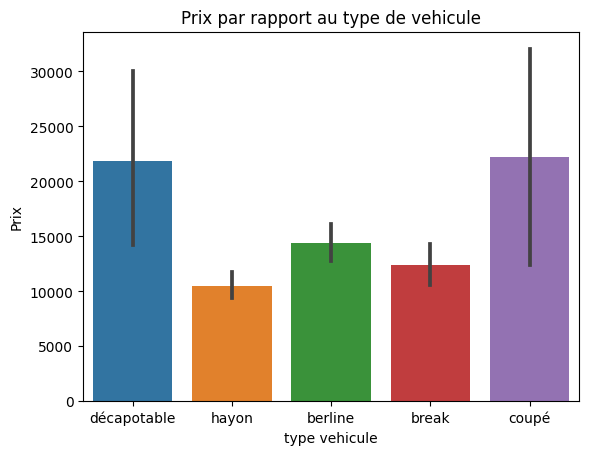

In [182]:
g = sns.barplot(data=df, x="type_vehicule", y="prix")
g.set_xlabel("type vehicule")
g.set_ylabel("Prix")
g.set_title("Prix par rapport au type de vehicule")

## Prix par rapport au carburant

Text(0.5, 1.0, 'Prix par rapport au carburant')

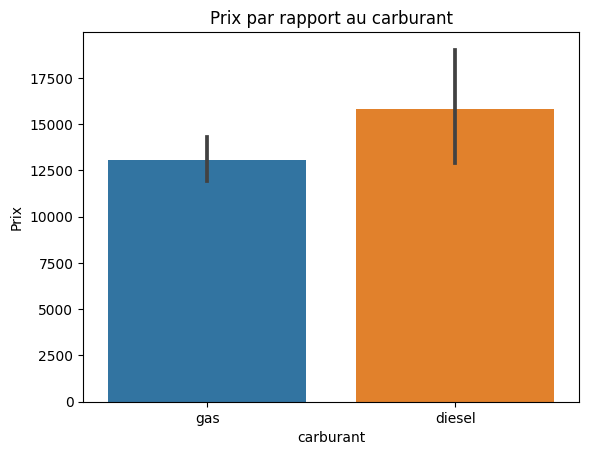

In [183]:
g = sns.barplot(data=df, x="carburant", y="prix")
g.set_xlabel("carburant")
g.set_ylabel("Prix")
g.set_title("Prix par rapport au carburant")

## prix par rapport au turbo

Text(0.5, 1.0, 'Prix par rapport au turbo')

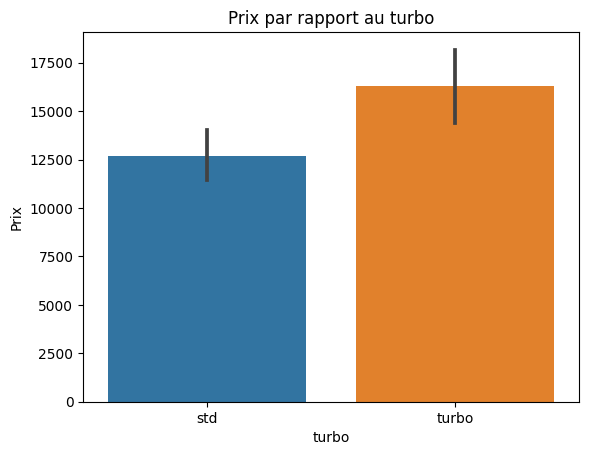

In [184]:
g = sns.barplot(data=df, x="turbo", y="prix")
g.set_xlabel("turbo")
g.set_ylabel("Prix")
g.set_title("Prix par rapport au turbo")

## Prix par rapport au nombre de portes

Text(0.5, 1.0, 'Prix par rapport au nombre_portes')

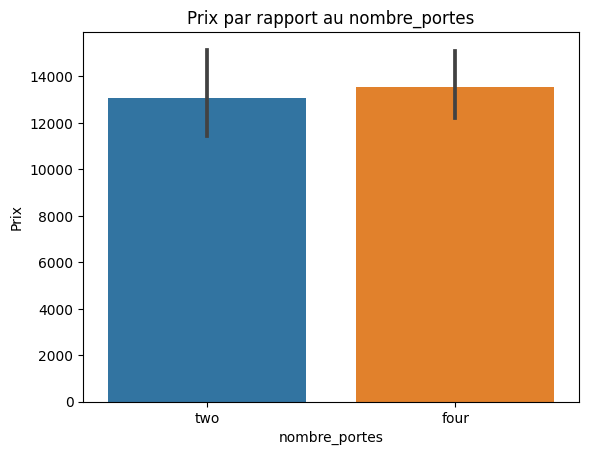

In [185]:
g = sns.barplot(data=df, x="nombre_portes", y="prix")
g.set_xlabel("nombre_portes")
g.set_ylabel("Prix")
g.set_title("Prix par rapport au nombre_portes")

# Prix par rapport au roues_motrices

Text(0.5, 1.0, 'Prix par rapport au roues_motrices')

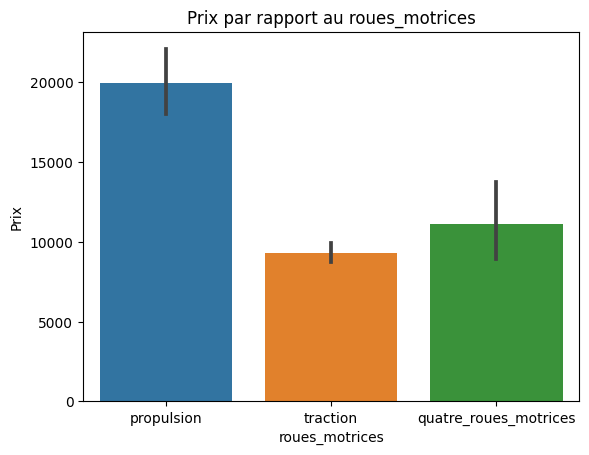

In [186]:
g = sns.barplot(data=df, x="roues_motrices", y="prix")
g.set_xlabel("roues_motrices")
g.set_ylabel("Prix")
g.set_title("Prix par rapport au roues_motrices")

## emplacement moteur

Text(0.5, 1.0, 'Prix par rapport au emplacement_moteur')

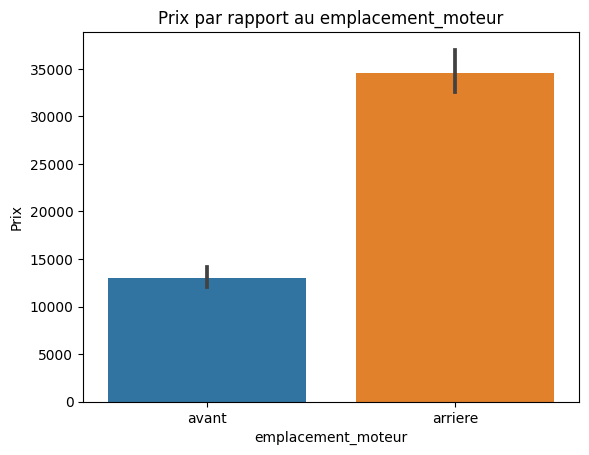

In [187]:
g = sns.barplot(data=df, x="emplacement_moteur", y="prix")
g.set_xlabel("emplacement_moteur")
g.set_ylabel("Prix")
g.set_title("Prix par rapport au emplacement_moteur")

## type moteur

Text(0.5, 1.0, 'Prix par rapport au type_moteur')

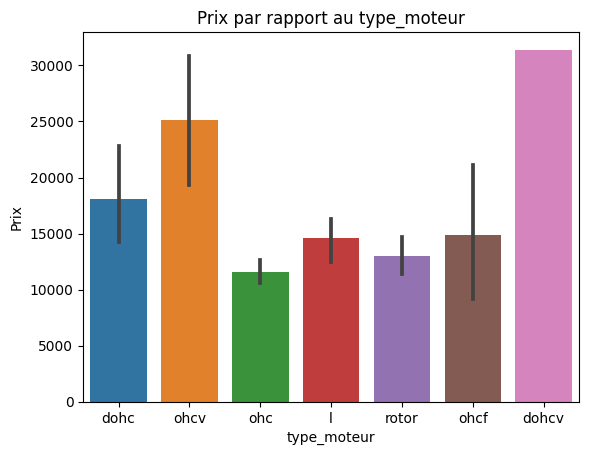

In [188]:
g = sns.barplot(data=df, x="type_moteur", y="prix")
g.set_xlabel("type_moteur")
g.set_ylabel("Prix")
g.set_title("Prix par rapport au type_moteur")

In [189]:
df["type_moteur"].value_counts()

ohc      148
ohcv      13
ohcf      13
dohc      12
l         12
rotor      4
dohcv      1
Name: type_moteur, dtype: int64

## nombre de cylindres

Text(0.5, 1.0, 'Prix par rapport au nombre_cylindres')

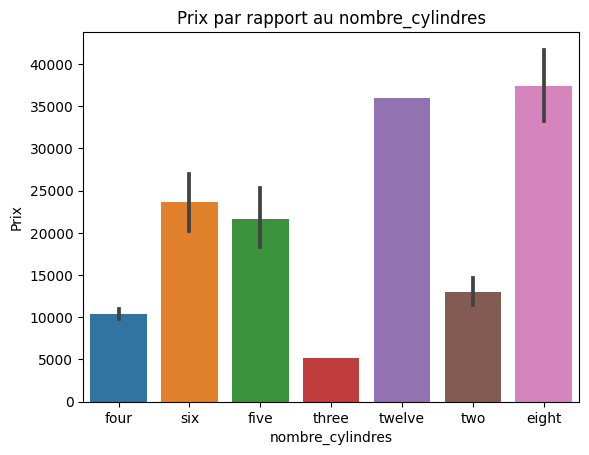

In [190]:
g = sns.barplot(data=df, x="nombre_cylindres", y="prix")
g.set_xlabel("nombre_cylindres")
g.set_ylabel("Prix")
g.set_title("Prix par rapport au nombre_cylindres")

## systeme carburant

Text(0.5, 1.0, 'Prix par rapport au systeme_carburant')

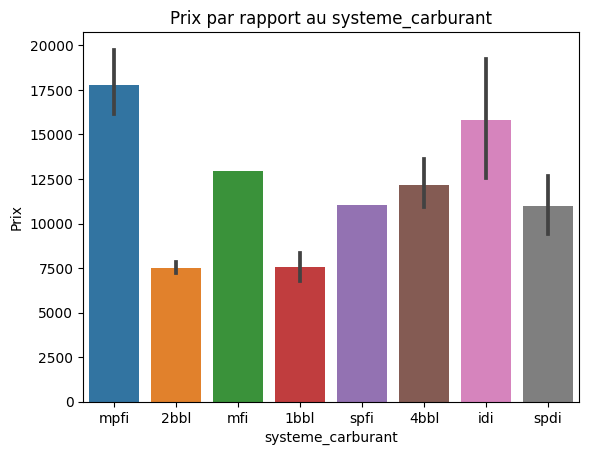

In [191]:
g = sns.barplot(data=df, x="systeme_carburant", y="prix")
g.set_xlabel("systeme_carburant")
g.set_ylabel("Prix")
g.set_title("Prix par rapport au systeme_carburant")

In [192]:
df["systeme_carburant"].value_counts()

mpfi    94
2bbl    64
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: systeme_carburant, dtype: int64

## La marque

[Text(0, 0, 'alfa-romeo'),
 Text(1, 0, 'audi'),
 Text(2, 0, 'bmw'),
 Text(3, 0, 'chevrolet'),
 Text(4, 0, 'dodge'),
 Text(5, 0, 'honda'),
 Text(6, 0, 'isuzu'),
 Text(7, 0, 'jaguar'),
 Text(8, 0, 'mazda'),
 Text(9, 0, 'buick'),
 Text(10, 0, 'mercury'),
 Text(11, 0, 'mitsubishi'),
 Text(12, 0, 'nissan'),
 Text(13, 0, 'peugeot'),
 Text(14, 0, 'plymouth'),
 Text(15, 0, 'porsche'),
 Text(16, 0, 'renault'),
 Text(17, 0, 'saab'),
 Text(18, 0, 'subaru'),
 Text(19, 0, 'toyota'),
 Text(20, 0, 'volkswagen'),
 Text(21, 0, 'volvo')]

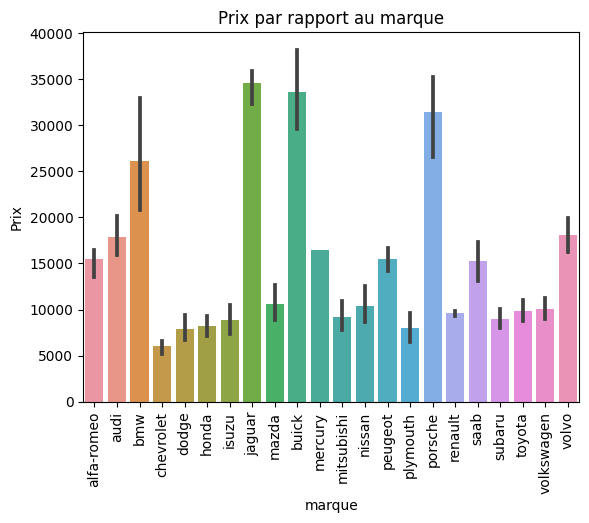

In [193]:
g = sns.barplot(data=df, x="marque", y="prix")
g.set_xlabel("marque")
g.set_ylabel("Prix")
g.set_title("Prix par rapport au marque")
g.set_xticklabels(g.get_xticklabels(), rotation=90)


## Modele

[Text(0, 0, 'giulia'),
 Text(1, 0, 'stelvio'),
 Text(2, 0, 'Quadrifoglio'),
 Text(3, 0, '100ls'),
 Text(4, 0, 'fox'),
 Text(5, 0, '5000'),
 Text(6, 0, '4000'),
 Text(7, 0, '5000s(diesel)'),
 Text(8, 0, '320i'),
 Text(9, 0, 'x1'),
 Text(10, 0, 'x3'),
 Text(11, 0, 'z4'),
 Text(12, 0, 'x4'),
 Text(13, 0, 'x5'),
 Text(14, 0, 'impala'),
 Text(15, 0, 'montecarlo'),
 Text(16, 0, 'vega2300'),
 Text(17, 0, 'rampage'),
 Text(18, 0, 'challengerse'),
 Text(19, 0, 'd200'),
 Text(20, 0, 'monaco(sw)'),
 Text(21, 0, 'colthardtop'),
 Text(22, 0, 'colt(sw)'),
 Text(23, 0, 'coronetcustom'),
 Text(24, 0, 'dartcustom'),
 Text(25, 0, 'coronetcustom(sw)'),
 Text(26, 0, 'civic'),
 Text(27, 0, 'civiccvcc'),
 Text(28, 0, 'accordcvcc'),
 Text(29, 0, 'accordlx'),
 Text(30, 0, 'civic1500gl'),
 Text(31, 0, 'accord'),
 Text(32, 0, 'civic1300'),
 Text(33, 0, 'prelude'),
 Text(34, 0, 'civic(auto)'),
 Text(35, 0, 'MU-X'),
 Text(36, 0, 'D-Max'),
 Text(37, 0, 'D-MaxV-Cross'),
 Text(38, 0, 'xj'),
 Text(39, 0, 'xf'),
 Text

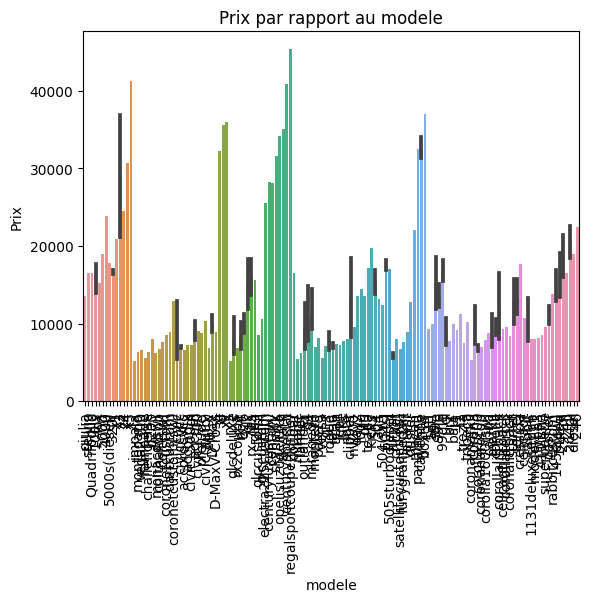

In [194]:
g = sns.barplot(data=df, x="modele", y="prix")
g.set_xlabel("modele")
g.set_ylabel("Prix")
g.set_title("Prix par rapport au modele")
g.set_xticklabels(g.get_xticklabels(), rotation=90)

## nouveau dataframe

In [200]:
df_clean = df.drop(columns=['empattement(cm)', 'taux_alésage(cm)', 'hauteur_voiture(cm)', 'taux_compression', 'course_piston(cm)', 'niveau_risque_assurance', 'tour_moteur', 'nombre_portes'])
df_clean.head()

,carburant,turbo,type_vehicule,roues_motrices,emplacement_moteur,longueur_voiture(cm),largeur_voiture(cm),poids_vehicule(kg),type_moteur,nombre_cylindres,taille_moteur,systeme_carburant,chevaux,consommation_ville(L/100km),consommation_autoroute(L/100km),prix,marque,modele
0,gas,std,décapotable,propulsion,avant,428.8,162.8,1155.8,dohc,four,130,mpfi,111,11.200714,8.711667,13495.0,alfa-romeo,giulia
1,gas,std,décapotable,propulsion,avant,428.8,162.8,1155.8,dohc,four,130,mpfi,111,11.200714,8.711667,16500.0,alfa-romeo,stelvio
2,gas,std,hayon,propulsion,avant,434.8,166.4,1280.5,ohcv,six,152,mpfi,154,12.379737,9.046731,16500.0,alfa-romeo,Quadrifoglio
3,gas,std,berline,traction,avant,448.6,168.1,1060.0,ohc,four,109,mpfi,102,9.800625,7.840500,13950.0,audi,100ls
4,gas,std,berline,quatre_roues_motrices,avant,448.6,168.7,1280.9,ohc,five,136,mpfi,115,13.067500,10.691591,17450.0,audi,100ls


In [202]:
df_clean.to_csv('../data/carprice_clean.csv', index=False)
